# Fazendo as primeiras visualizações

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

from util import *

# sns.set(rc={"figure.figsize": (20,8)}, font_scale=2)

In [2]:
local_dados = "./../data/"
dic_list = os.listdir(local_dados)
dic_list = [local_dados+i for i in dic_list]
printLis(dic_list)

-------------
-=< Lista >=-
-------------
0 -> ./../data/iris.csv
1 -> ./../data/monitoramento_tempo.csv


In [3]:
# monitoramento_tempo.csv
df = pd.read_csv(dic_list[1])
df.head()

,temperatura,pressão,humidade,direção do vento,velocidade do vento,dia_da_semana,data
0,282.080000,1024.0,81.0,0.0,0.0,Domingo,2012-10-01 12:00:00
1,282.080000,1024.0,81.0,0.0,0.0,Domingo,2012-10-01 13:00:00
2,282.083252,1024.0,80.0,4.0,0.0,Domingo,2012-10-01 14:00:00
3,282.091866,1024.0,80.0,18.0,0.0,Domingo,2012-10-01 15:00:00
4,282.100481,1024.0,80.0,31.0,0.0,Domingo,2012-10-01 16:00:00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temperatura          45253 non-null  float64
 1   pressão              45253 non-null  float64
 2   humidade             45253 non-null  float64
 3   direção do vento     45253 non-null  float64
 4   velocidade do vento  45253 non-null  float64
 5   dia_da_semana        45253 non-null  object 
 6   data                 45253 non-null  object 
dtypes: float64(5), object(2)
memory usage: 2.4+ MB


In [5]:
df['data'] = pd.to_datetime(df['data'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   temperatura          45253 non-null  float64       
 1   pressão              45253 non-null  float64       
 2   humidade             45253 non-null  float64       
 3   direção do vento     45253 non-null  float64       
 4   velocidade do vento  45253 non-null  float64       
 5   dia_da_semana        45253 non-null  object        
 6   data                 45253 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 2.4+ MB


In [6]:
temperatura_por_dia_da_semana = df.groupby("dia_da_semana")['temperatura'].mean()
nome_dias = ["Domingo","Segunda","Terça","Quarta","Quinta","Sexta","Sábado"]
temperatura_por_dia_da_semana = temperatura_por_dia_da_semana.loc[nome_dias]
temperatura_por_dia_da_semana

dia_da_semana
Domingo    285.009095
Segunda    284.985382
Terça      284.892811
Quarta     284.998290
Quinta     285.000643
Sexta      285.060886
Sábado     285.003316
Name: temperatura, dtype: float64

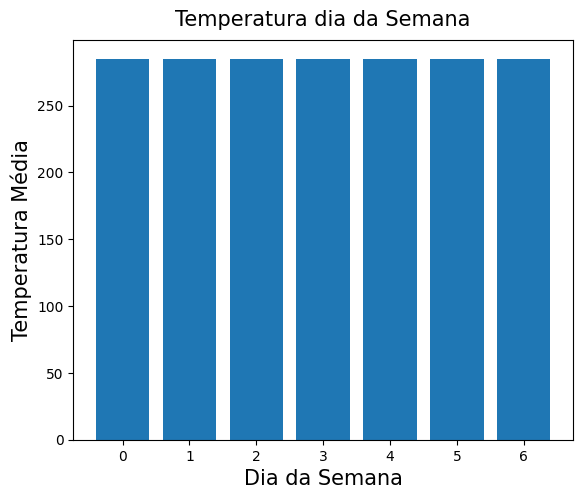

In [7]:
fig = plt.figure(figsize=(5,4))

eixo = fig.add_axes([0,0,1,1])
eixo.set_title("Temperatura dia da Semana", fontsize=15, pad=10)
indice = range(len(temperatura_por_dia_da_semana))
eixo.bar(indice, temperatura_por_dia_da_semana)

eixo.set_xlabel("Dia da Semana", fontsize=15)
eixo.set_ylabel("Temperatura Média", fontsize=15)

plt.show()

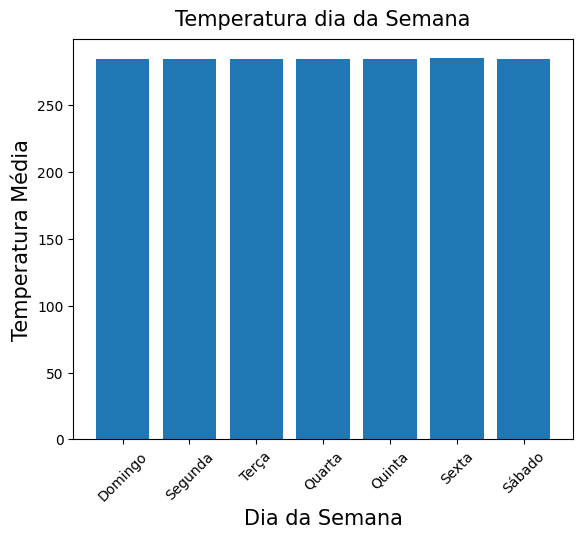

In [8]:
fig = plt.figure(figsize=(5,4))

eixo = fig.add_axes([0,0,1,1])
eixo.set_title("Temperatura dia da Semana", fontsize=15, pad=10)
indice = range(len(temperatura_por_dia_da_semana))
eixo.bar(indice, temperatura_por_dia_da_semana)

eixo.set_xlabel("Dia da Semana", fontsize=15)
eixo.set_ylabel("Temperatura Média", fontsize=15)

eixo.set_xticks(indice)
eixo.set_xticklabels(nome_dias, rotation=45)

plt.show()

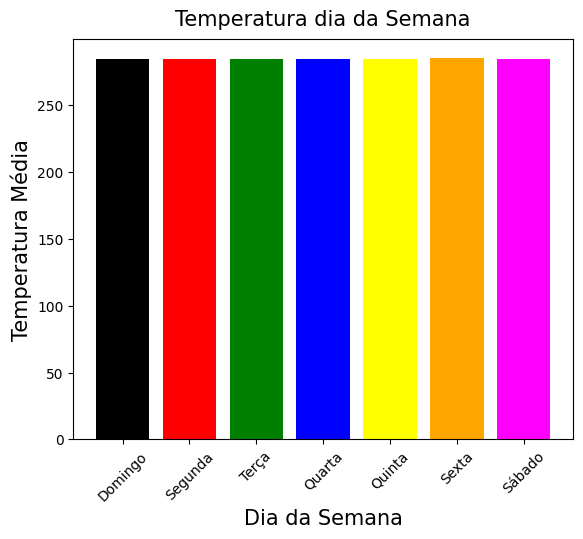

In [9]:
fig = plt.figure(figsize=(5,4))

indice = range(len(temperatura_por_dia_da_semana))
cores = ['black','red','green','blue','yellow','orange','magenta']

eixo = fig.add_axes([0,0,1,1])
eixo.set_title("Temperatura dia da Semana", fontsize=15, pad=10)
eixo.bar(indice, temperatura_por_dia_da_semana, color=cores)

eixo.set_xlabel("Dia da Semana", fontsize=15)
eixo.set_ylabel("Temperatura Média", fontsize=15)

eixo.set_xticks(indice)
eixo.set_xticklabels(nome_dias, rotation=45)

plt.show()

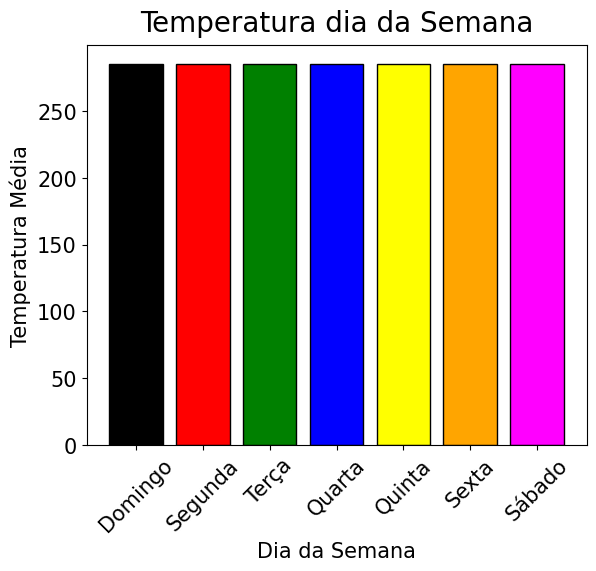

In [10]:
fig = plt.figure(figsize=(5,4))

indice = range(len(temperatura_por_dia_da_semana))
cores = ['black','red','green','blue','yellow','orange','magenta']

eixo = fig.add_axes([0,0,1,1])
eixo.set_title("Temperatura dia da Semana", fontsize=20, pad=10)
eixo.bar(indice, temperatura_por_dia_da_semana, color=cores, edgecolor='k')

eixo.tick_params(labelsize=15)
eixo.set_xlabel("Dia da Semana", fontsize=15)
eixo.set_ylabel("Temperatura Média", fontsize=15)

eixo.set_xticks(indice)
eixo.set_xticklabels(nome_dias, rotation=45)

plt.show()
resultados = "./results/"
if not os.path.exists(resultados):
    os.makedirs(resultados)

fig.savefig(resultados+'bars.png', bbox_inches='tight', dpi=300)